In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

In [2]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from matplotlib import pyplot


In [3]:
df = pd.read_pickle("sp500.pickle")

# extract needed fields and test date range
test = df.loc["2017-12-29":"2019-01-01"].copy()
test = test[['Target', 'Target+', 'Target_']]

# create predictions using previous day value
test['Predict'] = test['Target'].shift(1)
test['Predict+'] = test['Target+'].shift(1)
test['Predict_'] = test['Target_'].shift(1)

# Reorder for easy reading
test = test[['Predict', 'Target', 'Predict+', 'Target+', 'Predict_', 'Target_' ]]

# drop first row from 2017
test = test[1:]
test['Predict_'] = test['Predict_'].astype(int)
test.head(5)


,Predict,Target,Predict+,Target+,Predict_,Target_
Date,,,,,,
2018-01-02,2673.610107,2695.810059,-0.518315,0.830336,0,1
2018-01-03,2695.810059,2713.060059,0.830336,0.639882,1,1
2018-01-04,2713.060059,2723.989990,0.639882,0.402864,1,1
2018-01-05,2723.989990,2743.149902,0.402864,0.703377,1,1
2018-01-08,2743.149902,2747.709961,0.703377,0.166234,1,1


In [4]:
absolute_mse = mean_squared_error(test['Predict'], test['Target'])
print("MSE between Predict and Target: {:f}".format(absolute_mse))

MSE between Predict and Target: 814.191101


In [5]:
relative_mse = mean_squared_error(test['Predict+'], test['Target+'])
print("MSE between Predict+ and Target+: {:f}".format(relative_mse))

MSE between Predict+ and Target+: 2.278018


In [6]:
classify_score = accuracy_score(test['Predict_'], test['Target_'])
print("Classify accuracy between Predict_ and Target_: {:f}".format(classify_score))

Classify accuracy between Predict_ and Target_: 0.492126


/home/geoffrey/anaconda3/envs/ai/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


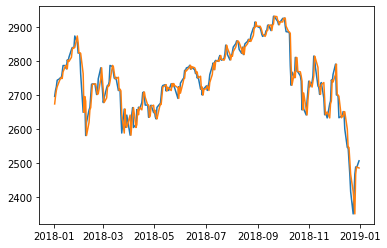

In [7]:
# plot predictions and expected results for Absolute 
pyplot.plot(test['Target'])
pyplot.plot(test['Predict'])
pyplot.show()

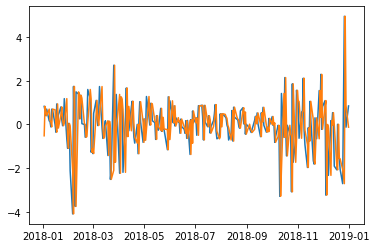

In [8]:
# plot predictions and expected results for Relative  
pyplot.plot(test['Target+'])
pyplot.plot(test['Predict+'])
pyplot.show()

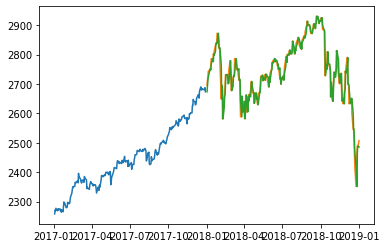

In [9]:
validation = df.loc["2017-01-01":"2018-01-01"]['Target']
pyplot.plot(validation)
pyplot.plot(test['Target'])
pyplot.plot(test['Predict'])
pyplot.show()

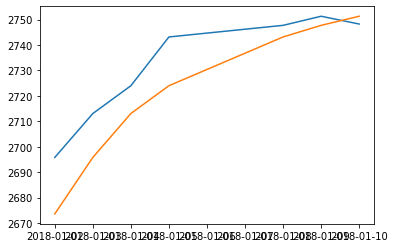

In [10]:
validation = df.loc["2017-10-01":"2018-01-01"]['Target']
# pyplot.plot(validation)
pyplot.plot(test.loc["2018-01-01":"2018-01-10"]['Target'])
pyplot.plot(test.loc["2018-01-01":"2018-01-10"]['Predict'])
pyplot.show()